# 2. Data Preparation


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
directory = "../dataset-numpy/"

dataset = pd.read_csv(os.path.join(directory, 'features.csv'), delimiter=',', header=0)

dataset.describe(include='all')

,label,area,area_filled,area_convex,axis_major_length,axis_minor_length,eccentricity,equivalent_diameter_area,extent,feret_diameter_max,...,v_sym_err_percent,pixelsum_tl,pixelsum_tm,pixelsum_tr,pixelsum_ml,pixelsum_mm,pixelsum_mr,pixelsum_bl,pixelsum_bm,pixelsum_br
count,42000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,198.378214,224.449024,389.734643,30.201964,19.233570,0.716395,15.686753,0.353860,28.986606,...,0.386245,0.0,0.0,5.508357,7.970476,8.044762,8.549952,7.552714,7.861952,8.718548
std,NaN,62.421688,88.333802,79.380182,3.794475,5.096191,0.168981,2.551261,0.109775,3.158338,...,0.097921,0.0,0.0,3.437395,4.479002,4.499773,4.826076,4.576410,4.674163,5.094703
min,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.128379,0.100694,1.000000,...,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,159.000000,162.000000,361.000000,28.134902,17.081622,0.612249,14.228320,0.281250,27.294688,...,0.322917,0.0,0.0,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
50%,NaN,192.000000,206.000000,399.000000,30.356730,20.293650,0.734565,15.635280,0.336806,29.206164,...,0.378472,0.0,0.0,5.000000,7.000000,7.000000,8.000000,6.000000,7.000000,8.000000
75%,NaN,230.000000,270.000000,438.000000,32.584134,22.574664,0.842331,17.112717,0.402778,31.240999,...,0.444444,0.0,0.0,7.000000,10.000000,10.000000,12.000000,10.000000,10.000000,12.000000


## 2.1 Select Data

We print the Pearson correlation matrix to see if there is any correlation between the features. We can see that there is a strong negative correlation between the two features.

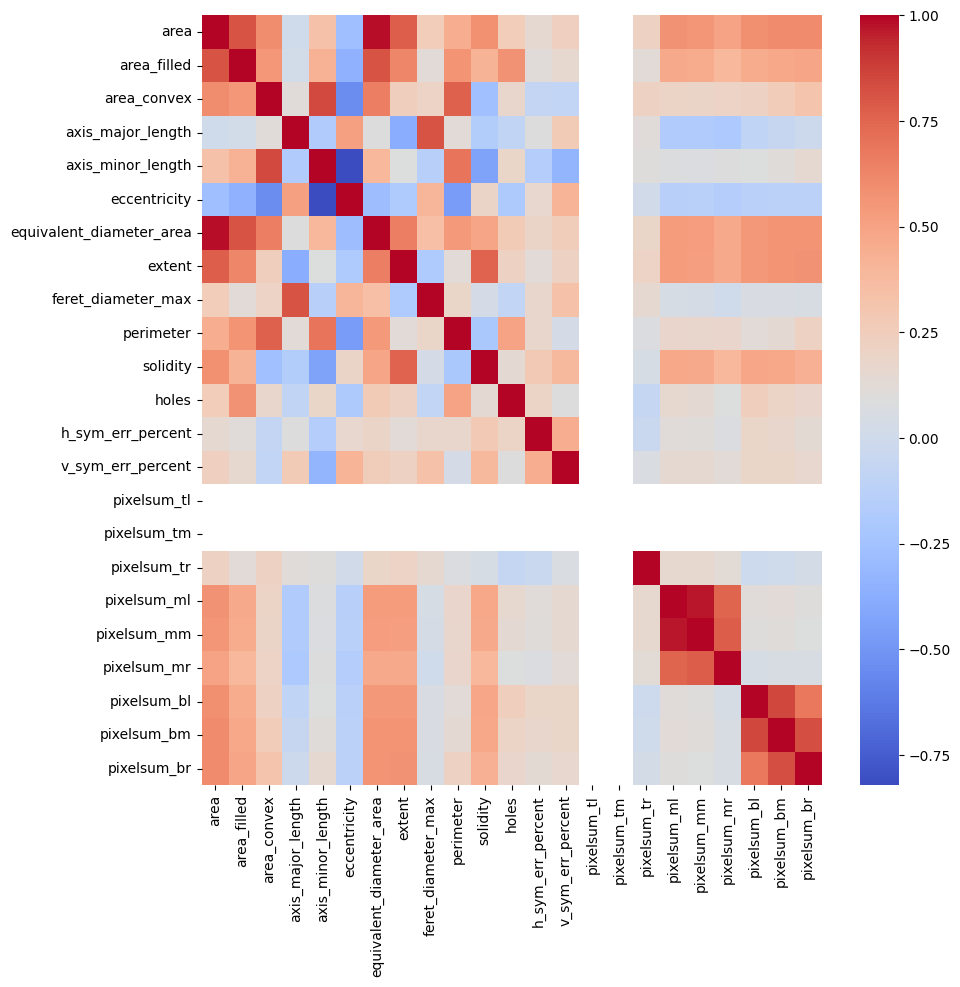

In [3]:
# Print Pearson correlation matrix
labels = [col for col in dataset.columns if col != 'label']

corr = dataset[labels].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.show()

In [4]:
# remove fields pixelsum_tl and pixelsum_tm
dataset = dataset.drop(columns=['pixelsum_tl', 'pixelsum_tm'])
# reindex columns
labels = [col for col in dataset.columns if col != 'label']

Principal Component Analysis (PCA)

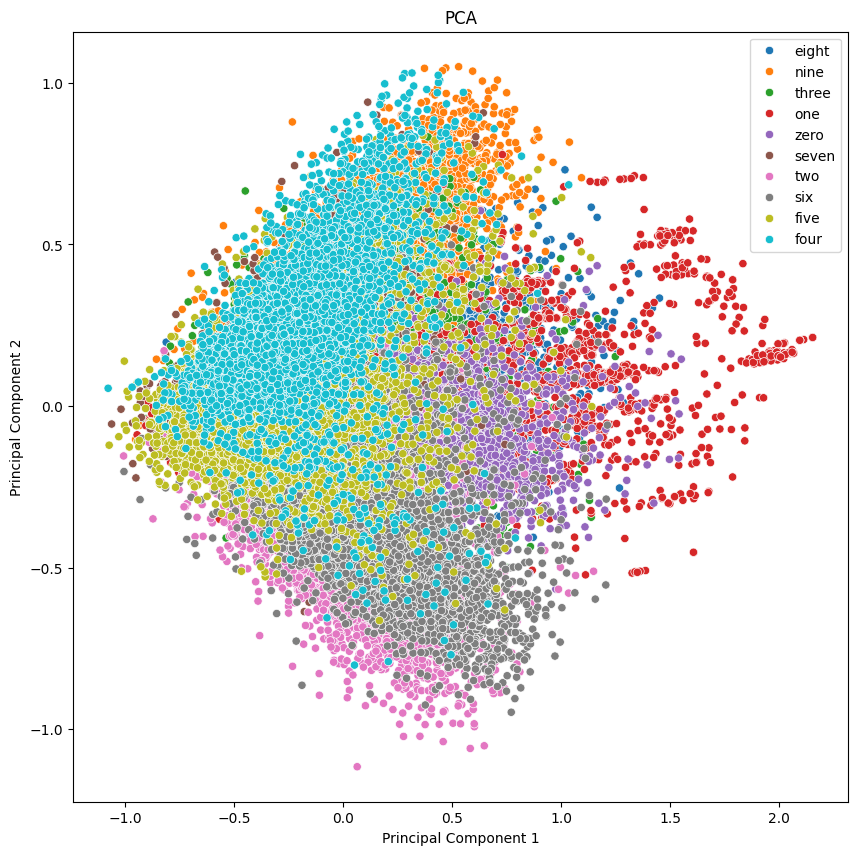

Selected features:
Feature 1: pixelsum_br
Feature 2: pixelsum_mr
Feature 3: axis_minor_length
Feature 4: feret_diameter_max
Feature 5: holes
Feature 6: pixelsum_tr
Feature 7: pixelsum_bl
Feature 8: pixelsum_mr
Feature 9: h_sym_err_percent
Feature 10: pixelsum_mr


,label,axis_minor_length,feret_diameter_max,holes,h_sym_err_percent,pixelsum_tr,pixelsum_mr,pixelsum_bl,pixelsum_br
count,42000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.233570,28.986606,0.392690,0.417798,5.508357,8.549952,7.552714,8.718548
std,NaN,5.096191,3.158338,0.589203,0.099382,3.437395,4.826076,4.576410,5.094703
min,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,17.081622,27.294688,0.000000,0.354167,3.000000,5.000000,4.000000,5.000000
50%,NaN,20.293650,29.206164,0.000000,0.420139,5.000000,8.000000,6.000000,8.000000
75%,NaN,22.574664,31.240999,1.000000,0.486111,7.000000,12.000000,10.000000,12.000000


In [5]:
X = dataset[labels].values
y = dataset['label'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

# print selected 10 features
print('Selected features:')
for i, feature in enumerate(pca.components_):
    print(f'Feature {i+1}: {labels[np.argmax(feature)]}')

# drop the colomns that are not selected
dataset = dataset.drop(columns=[col for col in labels if col not in [labels[np.argmax(feature)] for feature in pca.components_]])
dataset.describe(include='all')

## 2.2 Cleaning Data

In [6]:
dataset_cleaned = dataset.copy()

# Deal with outliers by removing elements with more than 3 holes (max value is 2 for number 8, and an extra is kept for slight errors)
dataset_cleaned = dataset_cleaned[dataset_cleaned['holes'] < 4]

dataset_cleaned.describe(include='all')

,label,axis_minor_length,feret_diameter_max,holes,h_sym_err_percent,pixelsum_tr,pixelsum_mr,pixelsum_bl,pixelsum_br
count,41998,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.233806,28.986570,0.392519,0.417795,5.508381,8.550074,7.552669,8.718606
std,NaN,5.096197,3.158403,0.588690,0.099383,3.437469,4.826159,4.576482,5.094807
min,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,17.082145,27.294688,0.000000,0.354167,3.000000,5.000000,4.000000,5.000000
50%,NaN,20.293787,29.206164,0.000000,0.420139,5.000000,8.000000,6.000000,8.000000
75%,NaN,22.574764,31.240999,1.000000,0.486111,7.000000,12.000000,10.000000,12.000000


In [7]:
dataset_cleaned = dataset_cleaned[dataset_cleaned['axis_minor_length'] < 25]

dataset_cleaned.describe(include='all')

,label,axis_minor_length,feret_diameter_max,holes,h_sym_err_percent,pixelsum_tr,pixelsum_mr,pixelsum_bl,pixelsum_br
count,38946,38946.000000,38946.000000,38946.000000,38946.000000,38946.000000,38946.000000,38946.000000,38946.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.662949,29.074115,0.375905,0.423962,5.472783,8.564294,7.519103,8.608175
std,NaN,4.838384,3.219214,0.585105,0.095194,3.410780,4.837202,4.602573,5.106092
min,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,16.742763,27.459060,0.000000,0.361111,3.000000,5.000000,4.000000,5.000000
50%,NaN,19.941915,29.410882,0.000000,0.423611,5.000000,8.000000,6.000000,7.000000
75%,NaN,22.072952,31.240999,1.000000,0.489583,7.000000,12.000000,10.000000,12.000000


In [8]:
# Deal with outliers by removing elements who's h_sym_err_percent is 0
dataset_cleaned = dataset_cleaned[dataset_cleaned['h_sym_err_percent'] != 0]
dataset_cleaned.describe(include='all')

,label,axis_minor_length,feret_diameter_max,holes,h_sym_err_percent,pixelsum_tr,pixelsum_mr,pixelsum_bl,pixelsum_br
count,38945,38945.000000,38945.000000,38945.000000,38945.000000,38945.000000,38945.000000,38945.000000,38945.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.662787,29.074060,0.375915,0.423973,5.472615,8.563898,7.518680,8.607780
std,NaN,4.838341,3.219237,0.585110,0.095171,3.410664,4.836632,4.601874,5.105562
min,NaN,0.000000,1.000000,0.000000,0.027778,1.000000,0.000000,0.000000,0.000000
25%,NaN,16.742720,27.459060,0.000000,0.361111,3.000000,5.000000,4.000000,5.000000
50%,NaN,19.941912,29.410882,0.000000,0.423611,5.000000,8.000000,6.000000,7.000000
75%,NaN,22.072889,31.240999,1.000000,0.489583,7.000000,12.000000,10.000000,12.000000


In [9]:
unique_labels = dataset_cleaned['label'].unique()

images_dict = {elem : pd.DataFrame() for elem in unique_labels }

for key in images_dict.keys():
    images_dict[key] = dataset_cleaned[:][dataset_cleaned.label == key]

print("Print the number of images for each label")
for label in images_dict:
    print(label, len(images_dict[label]))

Print the number of images for each label
eight 3830
nine 4130
three 4120
one 4592
zero 2467
seven 4303
two 4009
six 3927
five 3500
four 4067


In [10]:
for label, image_set in images_dict.items():
    print(f"Label: {label}")
    # get the most frequent 'hole' value for the label
    mode_holes = np.bincount(images_dict[label]['holes']).argmax()
    print(f'Mode holes: {mode_holes}')

    # Where the num of holes is not equal to the mode, replace the value with the mode
    images_dict[label]['holes'] = np.where(images_dict[label]['holes'] != mode_holes, mode_holes, images_dict[label]['holes'])
    print(images_dict[label].describe(include='all'))


Label: eight
Mode holes: 2
        label  axis_minor_length  feret_diameter_max   holes  \
count    3830        3830.000000         3830.000000  3830.0   
unique      1                NaN                 NaN     NaN   
top     eight                NaN                 NaN     NaN   
freq     3830                NaN                 NaN     NaN   
mean      NaN          18.723509           29.456181     2.0   
std       NaN           3.861760            2.647919     0.0   
min       NaN           0.000000            1.000000     2.0   
25%       NaN          16.079638           28.301943     2.0   
50%       NaN          19.268029           29.832868     2.0   
75%       NaN          21.710245           31.240999     2.0   
max       NaN          24.998125           33.241540     2.0   

        h_sym_err_percent  pixelsum_tr  pixelsum_mr  pixelsum_bl  pixelsum_br  
count         3830.000000  3830.000000  3830.000000  3830.000000  3830.000000  
unique                NaN          NaN      

In [12]:
for label, image_set in images_dict.items():
    q1 = image_set['axis_minor_length'].quantile(0.25) # 25th percentile
    q3 = image_set['axis_minor_length'].quantile(0.75) # 75th percentile
    iqr = q3 - q1 # Interquartile range (IQR)
    fence_low = q1 - (1.5 * iqr) # Lower bound for outliers (anything below this value is an outlier)
    fence_high = q3 + (1.5 * iqr) # Upper bound for outliers (anything above this value is an outlier)
    image_set = image_set[~((image_set['axis_minor_length'] < fence_low) | (image_set['axis_minor_length'] > fence_high))] # Remove outliers from the dataset
    images_dict[label] = image_set # Update the dictionary

In [13]:
# reconstruct the dataset
dataset_cleaned = pd.concat(images_dict.values())

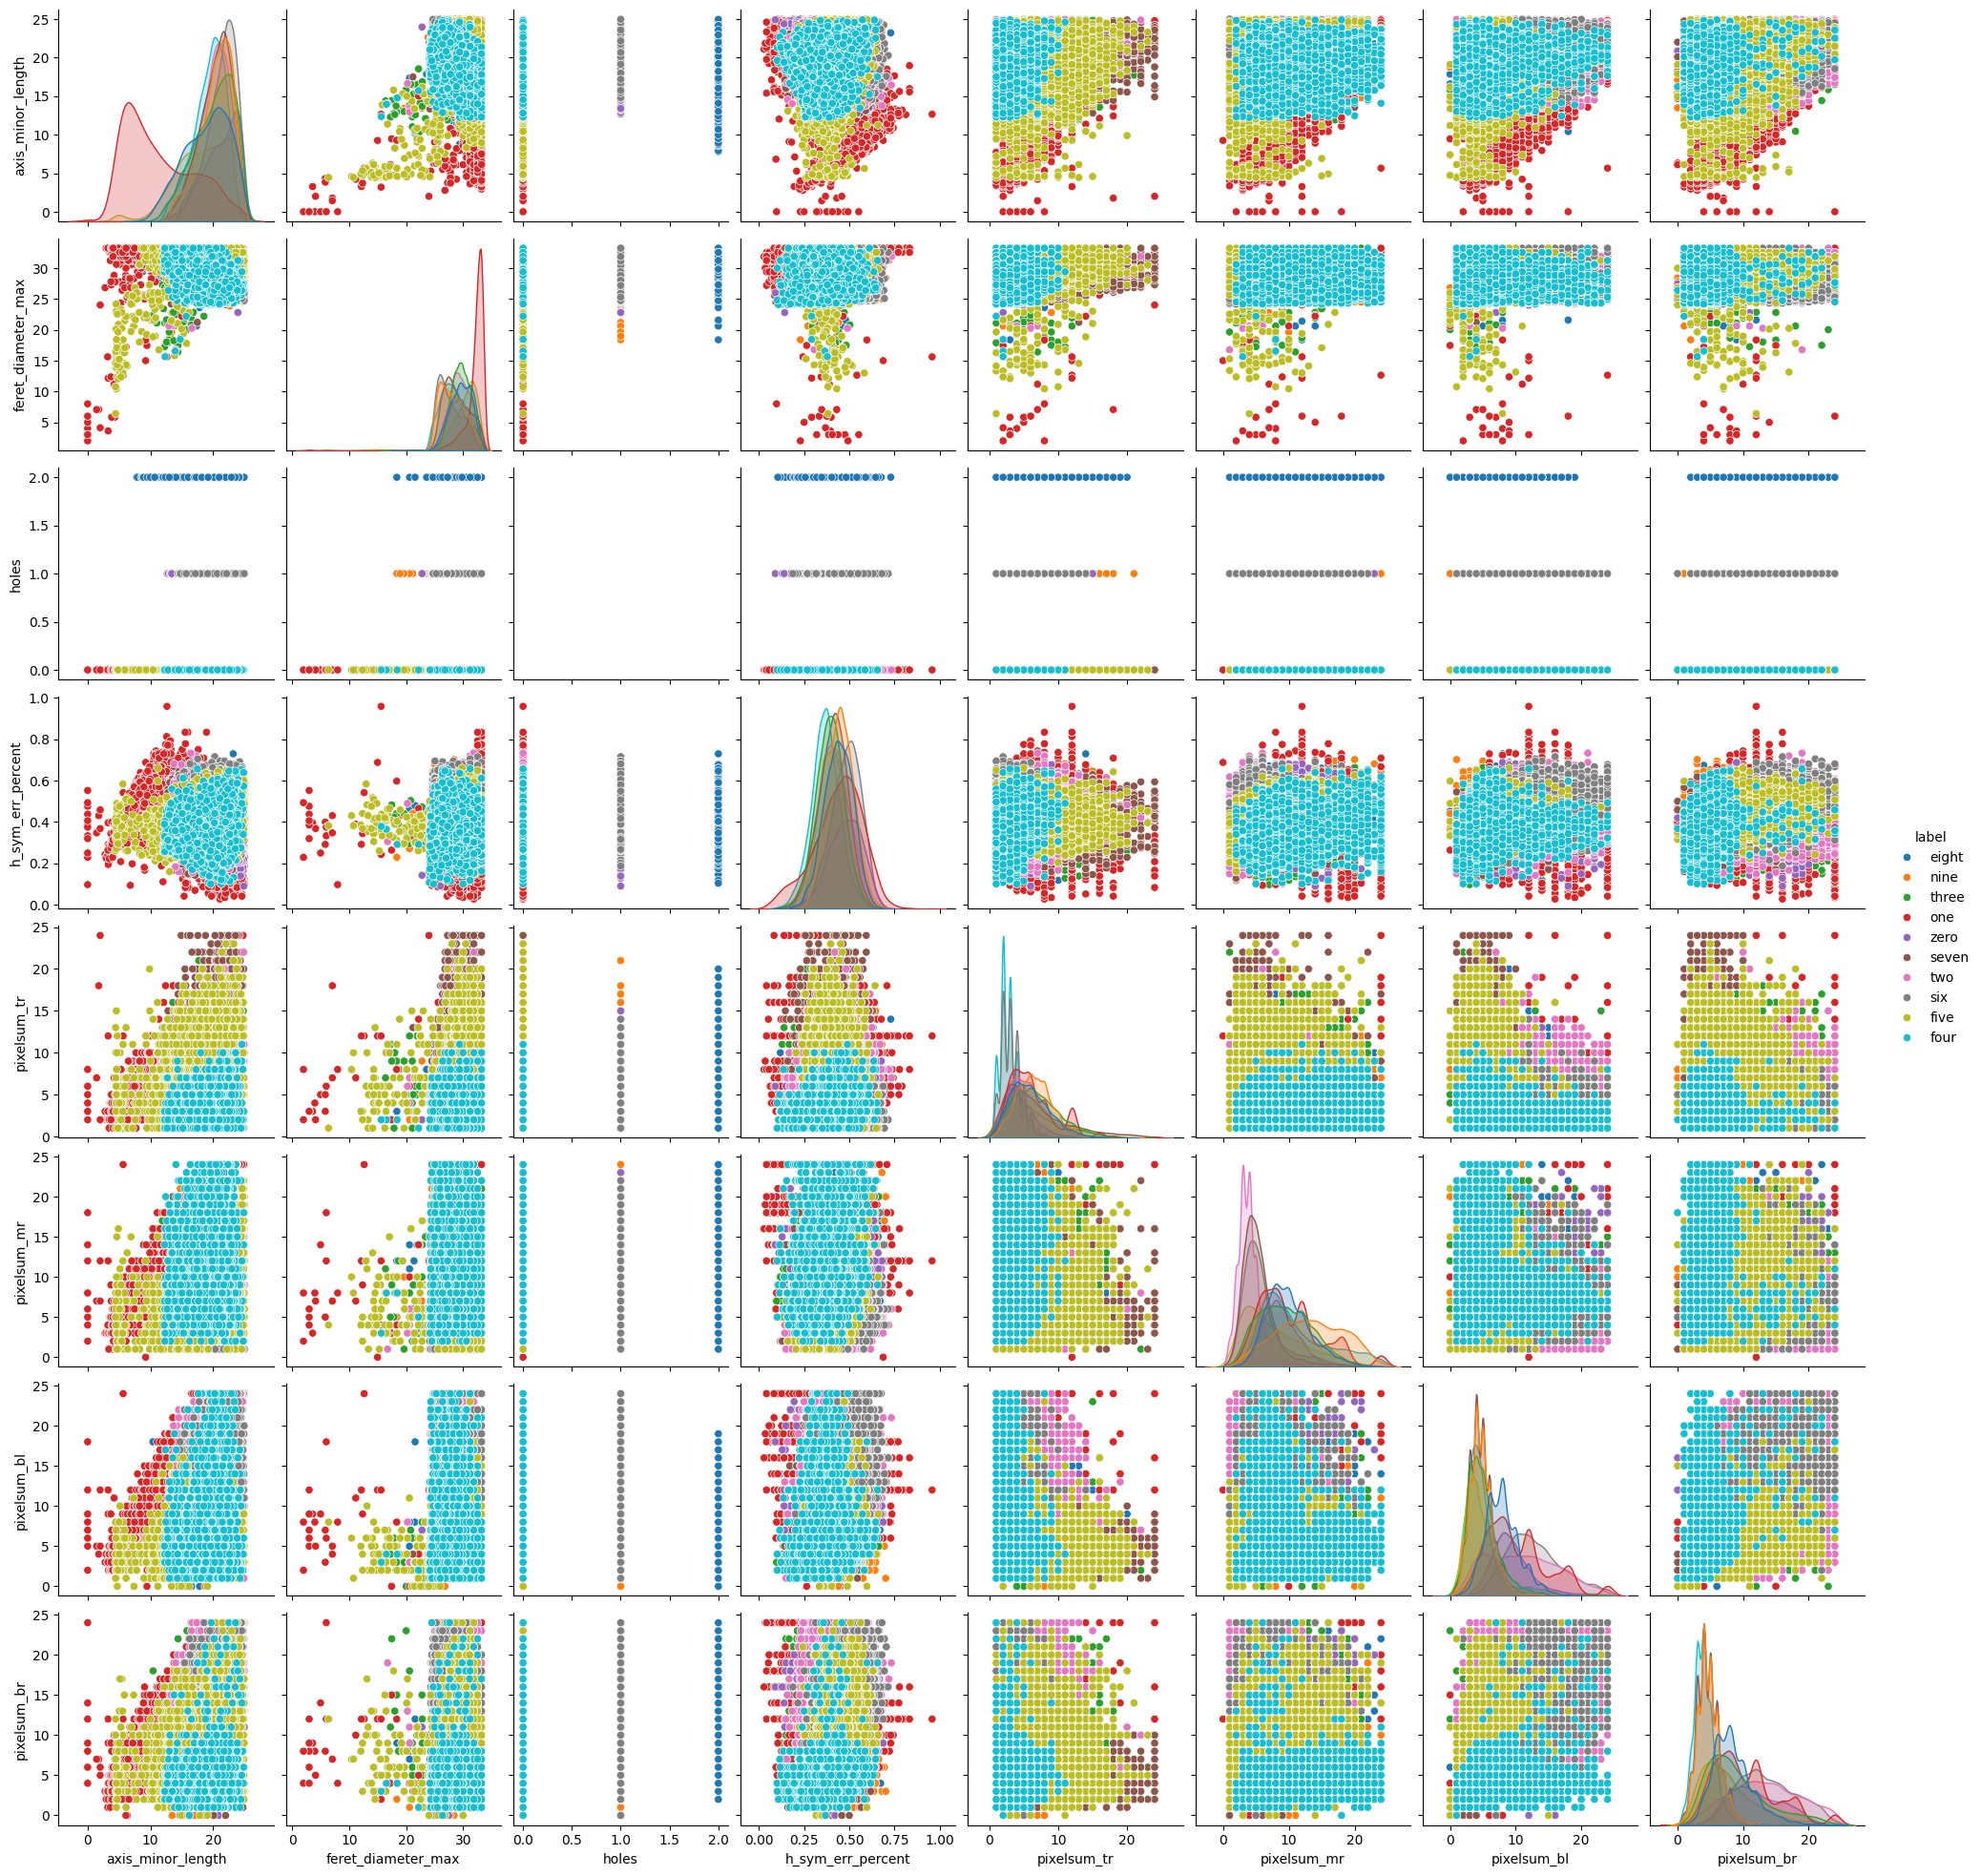

In [14]:
sns.pairplot(dataset_cleaned, hue="label")

In [15]:
# min-max scaling
scaler = MinMaxScaler()
# scale all columns except the label column
dataset_cleaned.iloc[:, 1:] = scaler.fit_transform(dataset_cleaned.iloc[:, 1:])

In [16]:
directory = "../dataset-numpy/" 
path = os.path.join(directory, 'cleaned.csv')

dataset_cleaned.to_csv(path, index=False)